<br>
<font size=7><center>Data Analytic Contest 2019</center></font>  
<br>  
<font size=7><center>Airbnb Dataset</center></font>  
<br>   
<font size=4><center>Team: <mark>Hongfu</mark></center></font>  
<font size=3><center>Shengzhe Xu</center></font>  
<font size=3><center>Weicheng Zhang</center></font>  
<font size=3><center>Shengchen Fu</center></font>  
<font size=3><center>Dun Lin</center></font>

__<mark><font size=5.5>Table of Content</font></mark>__
## [Descriptive Statistics](#1) 
* [1 Important Variables](#1.-Important-Variables)
* [2 Statistics](#2.-Statistics)

## [Visualization](#2)
* [1 How popular has Airbnb become in Boston?](#1.-How-popular-has-Airbnb-become–in-Boston?)
* [2 What geography patterns appear in the Airbnb property listings?](#2.-What-geography-patterns-appear-in-the-Airbnb-property-listings?)
* [3 Which neighborhood is the most popular among customers?](#3.-Which-neighborhood-is-the-most-popular-among-customers?)

## [Data Mining](#3)

* [1 Data Preprocessing](#1.-Data-Preprocessing) 
* [2 Basic Regression](#2.-Basic-Regression)
* [3 Advanced Machine Learning](#3.-Advanced-Machine-Learning)


## [Insight and Recommendation](#4)

* [1 How is Airbnb really being used in and affecting the neighborhoods?](#1.-How-is-Airbnb-really-being-used-in-and-affecting-the-neighborhoods?) 
* [2 Is there any trend of using Airbnb in Boston over time?](#2.-Is-there-any-trend-of-using-Airbnb-in-Boston-over-time?)
* [3 What recommendation you will make to Airbnb hosts and Airbnb?](#3.-What-recommendation-you-will-make-to-Airbnb-hosts-and-Airbnb?)

## [Appendix](#5)


In [2]:
import pandas as pd
import numpy as np
import math
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

__<span id="1"><mark><font size=5.5>Descriptive Statistics</font></mark></span>__

After carefully reviewing the five data files, we concluded that except listings_details, the other four files contains information either not with large value or is included in the listings_details. So a sophisticated analysis upon listings_details is enough to answer all the questions in the instruction.

In [3]:
l_detail = pd.read_csv('listings_details.csv')
# checking shape
print("The dataset has {} rows and {} columns.".format(*l_detail.shape))
# ... and duplicates
print("It contains {} duplicates.".format(l_detail.duplicated().sum()))

The dataset has 55501 rows and 106 columns.
It contains 0 duplicates.


In [4]:
# peak into the data
l_detail.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,2.019030e+13,3/12/19,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de...,NaN,4804,https://www.airbnb.com/users/show/4804,Frank,12/3/08,Massachusetts,My wife and I and grown children frequently oc...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,4.0,4.0,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,NaN,Boston,MA,2128,Boston,"Boston, MA",US,United States,42.36524,-71.02936,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$125.00,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,30,1125,30,30,1125,1125,30.0,1125.0,5 months ago,t,0,27,57,147,3/12/19,15,2,7/10/15,2/22/19,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,super_strict_30,f,f,1,1,0,0,0.34
1,5506,https://www.airbnb.com/rooms/5506,2.019030e+13,3/12/19,**$79 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,NaN,NaN,https://a0.muscache.com/im/pictures/1598e8b6-5...,NaN,8229,https://www.airbnb.com/users/show/8229,Terry,2/19/09,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,6.0,6.0,"['email', 'phone', 'reviews'

## 1. Important Variables
There is a function in Scikit Learn that can show us which variables are important in terms of correlation with the target variable given a selected model. The code is included in the appendix. The top ten most important result is shown below as a plot.

![](graph/important.png)

- The most important features are **cleaning fee**
- Other important features are **distance**,  **bathrooms** and **size**
- Top 4 features account for  **70%**  of daily price

The relationship between the top six variables and price is shown below as six scattered plot.

![](graph/top_6.png)

The above plots shed some insights on what drives high price of listing:
- Listings are priced high if house cleaning is costly;
- The closer to the centriod of Boston, the higher the  price;
- Bathroom is a must! In a small range, the more bathrooms the better;
- Generally price and room size are positively correlated;
- Expensive listing usually require more deposit;
- Given an interval r.g. [1,6], price and number of accomodates are positively correlated

## 2. Statistics

From the table below we can see the statistical information about the top nine important variables. It is clearly that these variables have **long tail** as median > mean

![](graph/describe.png)

__<span id='2'><mark><font size=5.5>Visulization</font></mark></span>__

Before we jump into the plot we have to make a clear statement of our assumption. The "neighbourhood" variable in the data set contains over 26 categories, which makes it very hard to plot any difference between all of them, so we decide to do some grouping and devide Boston to 8 districts according to our own experience.

- <font color=crimson size=2>Boston University : </font> Located at the west of Boston, this area is full of great food and rich guys.
- <font color=steelblue size=2>Dorchester : </font> South of south Boston, near Quincy.
- <font color=DARKTURQUOISE size=2>Downtown : </font> The main city of Boston, including Chinatown and other tourism attractions.
- <font color=SEAGREEN size=2>Entertainment : </font> Mainly Fenway and Backbay area, where one can do shopping and see fancy buildings.
- <font color=DARKORANGE size=2>Forest Hills -Franklin Park : </font> A very large area not as crowded as downtown.
- <font color=MEDIUMPURPLE size=2>North East Boston : </font> Close to the airport and Somerville.
- <font color=LIGHTPINK size=2>South Boston : </font> Close to tourism attractions.
- <font color=SIENNA size=2>Suburb : </font> To the very south, scatter all around a large suburb area.
  

![](graph/onlymap.png)

## 1. How popular has Airbnb become in Boston?

To answer this question we can simply respond with "very popular", but we decide to show the trend of total property number in Boston for the past 20 years, month by month. 

As we can see from the animated graph, Airbnb had only a few hundreds of houses available in Boston in the beginning of 2001.Then the number started to grow at a constant rate in almost all regions in Boston, especially in downtown area (Financial district, Chinatown, North end etc.) and the entertainment area (Back bay, Fenway etc.), represented in light blue and green dots respectively. During recent years around 2015, the total number of Airbnb property underwent a blow out growth in all regions. So compared to 2012, we can see that Airbnb in Boston area has become as twice as popular, which is remarkable.

![](graph/1.gif)

## 2. What geography patterns appear in the Airbnb property listings?

We found that, according to the animated graph, the trend of growth synchronized in almost all regions, meaning that the growth accelerated and decelerated at the same time. The only difference is that changes in growth of some regions were more significant than the others.

Downtown and entertainment area had the fastest growth rate and the greatest number of houses by September 2019. This makes sense because they are the two most popular choices for both leisure and business travelers. Forest Hills and Franklin Park area was following right behind them mostly because of the large area it covers. On the other side, the suburb area unsurprisingly had the lowest number of houses and the lowest growth rate probably because of the unpopular locations. The pie chart below also support our theory.\

![](graph/pie.png)

## 3. Which neighborhood is the most popular among customers?

By September 2019, 21.3% of the Boston Airbnb houses were in downtown area, exceeding the entertainment area, which is the second place, by only 0.25%. On the other hand, the Southern suburb area only had 2886, or 5.2%, of all the Airbnb houses in Boston, trailing to the second last place, South Boston area, by 1043 houses.

In term of review numbers, each house in the North East Boston area has an average of 3.2 reviews per month, which is the highest among all. It is followed by houses in Dorchester and downtown area, each has a monthly average review of 2.2 and 2.1 per house respectively. This could mean that houses in this area are more popular as they are booked and reviewed more frequently. 

On the lower end, houses in the entertainment area have, on average, 1.7 reviews per month, only 0.03 higher than houses in suburb. Completely opposite to the situation in North East Boston, this low average review per house per month in the entertainment area could mean 1) many houses in this area are vacant frequently or 2) there is nothing special, either positive or negative, about houses in this area for customers to talk about, or 3) more houses are rented in long-term than in short term in this area.

![](graph/map.png)

## 4. Reviews Summary

One variable that intrigues us the most is the reivew data. We want to take a peek into the pattern shared by all the comment, so we made the following plot.

![](graph/words.png)

Here, the size of each word means its appearance frequency among all the words in the comments. Apparently location is what most of the customers care the most. Other important metrics include the degree of comfortable and cleanness, and the interaction experience with the host. Clearly, if a host is struggling with improving the reputation of his or her property, these words each indicate an aspect that the host should take care of.

__<span id='3'><mark><font size=5.5>Data Mining</font></mark></span>__
## [1 Data Preprocessing](#1.-Data-Preprocessing) 
* [1.1 Data Viewing and Missing Values](#1.1-Data-Viewing-and-Missing-Values)
* [1.2 Feature Engineering](#1.2-Feature-Engineering)
* [1.3 Detecting Outliner with Z-Score](#1.3.-Detecting-Outliner-with-Z-Score)

## [2 Basic Regression](#2.-Basic-Regression)
* [2.1 Splitting Data](#2.1.-Splitting-Data)
* [2.2 Linear, Ridge, and Lasso](#2.2.-Linear,-Ridge,-and-Lasso)
* [2.3 Coefficient Interpretation](#2.3.-Coefficient-Interpretation)

## [3 Advanced Machine Learning](#3.-Advanced-Machine-Learning)
* [3.1 Feed-forward Neural Network](#3.1.-Feed-forward-Neural-Network)
* [3.2 XGBoost Tree](#3.2.-XGBoost-Tree)
* [3.3 Random Forest](#3.3.-Random-Forest)

## [4 Summary](#4.-Summary)

# 1. Data Preprocessing
## 1.1 Data Viewing and Missing Values

In [5]:
used_columns = ['description','host_response_time', 'host_response_rate', 'host_is_superhost','host_total_listings_count',
             'host_has_profile_pic','host_identity_verified', 'latitude', 'longitude', 'property_type',
             'room_type','accommodates','bathrooms','bedrooms','beds','bed_type', 'amenities', 'square_feet',
             'minimum_nights', 'cleaning_fee', 'security_deposit', 'extra_people', 'guests_included',
             'review_scores_rating','instant_bookable',
             'cancellation_policy','reviews_per_month','price']
df = l_detail[used_columns].copy()
print("The dataset has {} rows and {} columns - after dropping irrelevant columns.".format(*df.shape))

The dataset has 55501 rows and 28 columns - after dropping irrelevant columns.


In [6]:
df[['price', 'cleaning_fee', 'security_deposit', 'extra_people']].isna().sum()

price                   0
cleaning_fee         8431
security_deposit    15746
extra_people            0
dtype: int64

In [7]:
df.cleaning_fee.fillna('$0.00', inplace=True)
df.security_deposit.fillna('$0.00', inplace=True)

In [8]:
# Transform from string to number
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)
df.cleaning_fee = df.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
df.security_deposit = df.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)
df.extra_people = df.extra_people.str.replace('$', '').str.replace(',', '').astype(float)

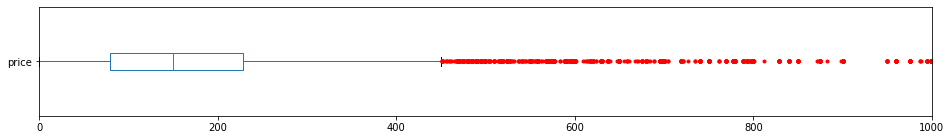

In [9]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

- 75% of the rooms charge up to a little bit more than \$200.
- Over 99% of the data fall into the interval of \$10 to \$1000, so we decide to consider all the price outside this interval as outliners.

In [10]:
df.drop(df[ (df.price > 1000) | (df.price == 0) ].index, axis=0, inplace=True)

In [11]:
print(df.isna().sum())
df.drop(columns=['square_feet', 'host_response_time', 'host_response_rate', 'review_scores_rating', 'reviews_per_month'], inplace=True)
df.dropna(subset=['host_total_listings_count', 'bathrooms', 'bedrooms', 'beds'], inplace=True)
df.host_has_profile_pic.fillna(value='f', inplace=True)
df.host_is_superhost.fillna(value='f', inplace=True)
df.host_identity_verified.fillna(value='f', inplace=True)
print('------After handling missing values-------')
print(df.isna().sum())


description                    478
host_response_time           12016
host_response_rate           12016
host_is_superhost                9
host_total_listings_count        9
host_has_profile_pic             9
host_identity_verified           9
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                       42
bedrooms                        38
beds                            19
bed_type                         0
amenities                        0
square_feet                  53859
minimum_nights                   0
cleaning_fee                     0
security_deposit                 0
extra_people                     0
guests_included                  0
review_scores_rating         10844
instant_bookable                 0
cancellation_policy              0
reviews_per_month            10348
price                            0
dtype: int64
------A

## 1.2. Feature Engineering

### 1.2.1. Distance to Prudential Center
Neighbourhood is a very important variable, but the data we are given has the neighbourhood in over 20 categories, which will make our data very wide after converting them into dummy variables. We have a better way to solve this. After living in Boston for more than one year, one will be aware of the fact that the Prudential Center marks the most luxurious and expensive district. Imagine an Airbnb room is located on the Prudential tower, what would its price be? So the first feature we want to generate is the distance to the landmark.

In [12]:
from geopy.distance import great_circle
def distance_to_prudential(lat, lon):
    prudential_center = (42.347345, -71.082503)
    accommodation = (lat, lon)
    return great_circle(prudential_center, accommodation).km

In [13]:
df['distance'] = df.apply(lambda x: distance_to_prudential(x.latitude, x.longitude), axis=1)

### 1.2.2. Lodging Area
One of the most important pieces of information for predicting the rate is the size. Since the column square_feet was heavily filled with null values, we dropped it in the previous section.

The description column seems to be rich in content. Let's extract

- all double-digit or three-digit numbers
- that are followed by one of the two characters "s" or "m" (covering "sqm", "square meters", "m2" etc.) and
- may or may not be connected by white space.
- Single- or more than three-digit numbers for accommodation sizes are quite unlikely.

In [14]:
# extract numbers 
df['size'] = df['description'].str.extract('([\s]\d{2,3}\s?[smSM])', expand=True)
df['size'] = df['size'].str.replace("\D", "")

# change datatype of size into float
df['size'] = df['size'].astype(float)

# delete the column of description
df.drop(['description'], axis=1, inplace=True)
print('Missing values in size_column absolute:     ', df['size'].isna().sum())
print('Missing values in size_column in percentage:', round(df['size'].isna().sum()/len(df)*100,3), '%')

Missing values in size_column absolute:      40968
Missing values in size_column in percentage: 74.702 %


We are missing so many value regarding the size of a house. Dropping out this column isn't an option since area is very important to predict price. Replacing the null with mean or medium for 70% of the data is also full of risk. Luckily, it is not informiddably difficult to give a guess about the area based on other parameters.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# filter out sub_df to work with
sub_df = df[['accommodates', 'bathrooms', 'bedrooms',  'price', 'cleaning_fee', 
                 'security_deposit', 'extra_people', 'guests_included', 'distance', 'size']]
# split datasets
train_data = sub_df[sub_df['size'].notnull()]
test_data  = sub_df[sub_df['size'].isnull()]

# define X
X_train = train_data.drop('size', axis=1)
X_test  = test_data.drop('size', axis=1)

# define y
y_train = train_data['size']

In [17]:
# instantiate
linreg = LinearRegression()

# fit model to training data
linreg.fit(X_train, y_train)

# predict
y_test = linreg.predict(X_test)

# merge back
X_test['size'] = y_test
sub_df_new = pd.concat([X_test, train_data], axis=0)

sub_df_new.head()

,accommodates,bathrooms,bedrooms,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size
1,2,1.0,1.0,145.0,40.0,0.0,0.0,1,2.226833,83.001874
2,4,1.0,1.0,169.0,70.0,0.0,8.0,2,2.136365,122.662802
3,2,1.0,1.0,65.0,0.0,0.0,30.0,1,7.513509,23.777098
4,2,1.0,1.0,99.0,250.0,1000.0,0.0,1,2.096716,248.728228
5,2,1.0,1.0,154.0,250.0,1000.0,0.0,1,2.091503,248.787828


In [18]:
df.drop(['accommodates', 'bathrooms', 'bedrooms', 'price', 'cleaning_fee', 
             'security_deposit', 'extra_people', 'guests_included', 'distance', 'size'], 
            axis=1, inplace=True)
df = pd.concat([sub_df_new, df], axis=1)


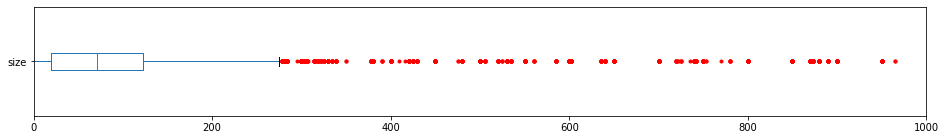

In [19]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df['size'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));
# Drop size outliner
df.drop(df[ (df['size'] <= 0.) | (df['size'] > 400.) ].index, axis=0, inplace=True)

### 1.2.3. Amenities
What the hosts offer the guests usually take up a huge part of the price. But the variable of amenities comes as a dictionary of string. We have to think of a way to extract the determining information from them. First, let's take a look of what our hosts often offer.

In [20]:
results = Counter()
df['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)
results.most_common(30)

[('Wifi', 51149),
 ('Heating', 50625),
 ('Smoke detector', 50071),
 ('Essentials', 49891),
 ('Kitchen', 47845),
 ('Carbon monoxide detector', 45804),
 ('Hangers', 45056),
 ('Air conditioning', 43312),
 ('Shampoo', 43159),
 ('Hair dryer', 42165),
 ('Iron', 41332),
 ('TV', 40761),
 ('Laptop friendly workspace', 39627),
 ('Washer', 36901),
 ('Dryer', 36700),
 ('Hot water', 32930),
 ('Fire extinguisher', 28661),
 ('Refrigerator', 25873),
 ('Self check-in', 24965),
 ('Microwave', 24612),
 ('Bed linens', 24226),
 ('Stove', 22830),
 ('Oven', 22442),
 ('Dishes and silverware', 22325),
 ('Coffee maker', 22128),
 ('Cable TV', 20998),
 ('Long term stays allowed', 20450),
 ('Cooking basics', 19217),
 ('Family/kid friendly', 19167),
 ('First aid kit', 17931)]

Let's pick out some amenities that are not offered by around half of the host. They are 
- TV
- Laptop friendly workspace
- Washer
- Dryer
- Hot water

After doing this, let's drop the original column,
We can also drop longitude and latitude since we have the distance to Prudential Center:

In [21]:
df['TV'] = df['amenities'].str.contains('TV')
df['Laptop_friendly_workspace'] = df['amenities'].str.contains('Laptop friendly workspace')
df['Washer'] = df['amenities'].str.contains('Washer')
df['Dryer'] = df['amenities'].str.contains('Dryer')
df['Hot_water'] = df['amenities'].str.contains('Hot water')
df.drop(['amenities'], axis=1, inplace=True)

df.drop(['latitude', 'longitude'], axis=1, inplace=True)

## 1.3. Detecting Outliner with Z-Score
Even though we have eliminate some of the outliner for price and size based on our subjective estimation, we have to take a step back and look at the whole picture to see whether they have more outliners statistically. Here we used a technique called Z-Score. If the Z-Score is larger than a threshold, we consider the row of the data a outliner and have to get rid of them.

In [22]:
#outlier detection with z score
def detect_outlier(data_1):
    feature_outliers=[]
    threshold=7
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    

    for index, y in enumerate(data_1):
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            feature_outliers.append(index)

    return feature_outliers

In [23]:
outliers = np.array([])
print("--Feature and Outlier Counts--")
df = df.reset_index(drop=True)
for column in df.columns:
    if df[column].dtype not in (float, int): continue
    f_out = detect_outlier(df[column])
    outliers = np.concatenate((outliers,np.asarray(f_out)))
    print(column ," outlier count :",len(f_out))
                              
outliers = np.unique(outliers,0)
print("Total Unique Outlier Index Count:",len(outliers))
df = df.drop(index=outliers)

--Feature and Outlier Counts--
accommodates  outlier count : 5
bathrooms  outlier count : 8
bedrooms  outlier count : 4
price  outlier count : 0
cleaning_fee  outlier count : 18
security_deposit  outlier count : 130
extra_people  outlier count : 98
guests_included  outlier count : 65
distance  outlier count : 0
size  outlier count : 0
host_total_listings_count  outlier count : 0
beds  outlier count : 80
minimum_nights  outlier count : 119
Total Unique Outlier Index Count: 495


# 2. Basic Regression
## 2.1. Splitting Data
Here we did three things:
- Separate the predictors variables and the target variable.
- Converting categorical variable to one-hot vectors (dummy variables).
- Splitting the data into 80% training data and 20% test data that the model can never look at.

In [24]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing

In [25]:
predictors = df.copy()
predictors.drop(columns = 'price', inplace = True)
target = df[["price"]]

In [26]:
# One hot encoding for categorical variables
for column in predictors.columns:
    if predictors[column].dtype == type(object):
        dummy = pd.get_dummies(predictors[column], drop_first = True)
        dummy.columns = [column+'_'+x for x in dummy]
        predictors = predictors.join(dummy)
        predictors = predictors.drop(columns=[column])

In [27]:
# Split data set into training and test
predictors = predictors.values
target = target.values
X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.2,random_state=0)
sc = preprocessing.MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

## 2.2. Linear, Ridge, and Lasso
We learned that these three regression are the rules of thumb when it comes to regression. How do they perform over our data?

From the box plot below we can tell that none of the linear models is detailed enough to yield an acceptable prediction of price. The estimate error is around 100. Ironically the estimate margin of error already equals to my budget when I am using Airbnb.

In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [31]:
models = []
models.append(('Linear', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))
# evaluate each model in turn
scores = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    cv_results = -cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
    scores.append(cv_results)
    names.append(name)    
scores[0] = [i for i in scores[0] if i < 20000]

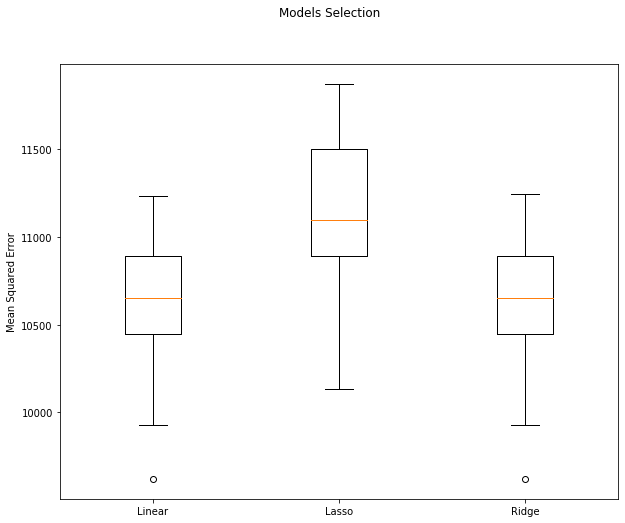

In [32]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,8))
fig.suptitle("Models Selection")
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
ax.set_ylabel('Mean Squared Error')
plt.show()

## 2.3. Coefficient Interpretation

In [35]:
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train).astype('float'))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     704.9
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:04:30   Log-Likelihood:            -2.5162e+05
No. Observations:               41582   AIC:                         5.034e+05
Df Residuals:                   41524   BIC:                         5.039e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        274.8380     74.508      3.689      0.000     128.801     420.875
x1           192.5332      9.275     20.757      0.000     174.353     210.713
x2           168.3355      6.040     27.868      0.000     156.496     180.175
x3           137.6644      6.520     21.113      0.000     124.885     150.444
x4           102.5939      6.810     15.065      0.000      89.246     115.941
x5             8.4307      5.319      1.585      0.113      -1.994      18.856
x6            -6.3134      5.022     -1.257      0.209     -16.157       3.530
x7           -26.9761      4.906     -5.498      0.000     -36.592     -17.360
x8          -151.6022      3.789    -40.014      0.000    -159.028    -144.176
x9            22.1234      5.222      4.237      0.000      11.888      32.359
x10          208.1087      3.564     58.392      0.000     201.123     215.094
x11            2.4007      9.138      0.263      0.793     -15.511      20.312
x12         -121.5963      6.516    -18.660      0.000    -134.368    -108.824
x13           18.9074      1.407     13.438      0.000      16.150      21.665
x14           -5.0228      1.263     -3.976      0.000      -7.499      -2.547
x15            4.1369      4.795      0.863      0.388      -5.261      13.534
x16           -1.2371      4.772     -0.259      0.795     -10.590       8.116
x17          -27.4075      1.205    -22.751      0.000     -29.769     -25.046
x18            8.2853      1.321      6.271      0.000       5.696      10.875
x19            0.7282     13.205      0.055      0.956     -25.154      26.611
x20            2.8490      1.095      2.601      0.009       0.702       4.995
x21         -143.9692     72.732     -1.979      0.048    -286.525      -1.413
x22          -66.9455     82.495     -0.812      0.417    -228.638      94.747
x23          -86.2828     72.958     -1.183      0.237    -229.282      56.717
x24          -84.3767     74.119     -1.138      0.255    -229.651      60.898
x25          -70.8509     73.484     -0.964      0.335    -214.881      73.179
x26          -44.2875     75.218     -0.589      0.556    -191.717     103.142
x27         -148.8597     89.086     -1.671      0.095    -323.471      25.751
x28         -173.1974    126.076     -1.374      0.170    -420.309      73.914
x29         -132.5299     72.748     -1.822      0.068    -275.118      10.058
x30         -172.1221     79.685     -2.160      0.031    -328.306     -15.938
x31        -1.499e-14   6.55e-14     -0.229      0.819   -1.43e-13    1.13e-13
x32          200.7423    102.857      1.952      0.051      -0.860     402.345
x33         -143.6901     72.880     -1.972      0.049    -286.536      -0.844
x34         -164.3583     74.180     -2.216      0.027    -309.752     -18.964
x35         -143.8989     74.779     -1.924      0.054    -290.467       2.669
x3

The output of linear regression shows that:

- **R sauqre** is 0.445, meaning 45% of total variance can be explained by linear model
- Most coefficients make sense. For example, more guests included, bathrooms, bedrooms and high cleaning fees lead to high price. 
- Interesting instances are negative coeffcients of **extra_prople** and **minimum_night**. The possible explanation could be that expensive house do not charge fee for extra people and require minimum nights
- it is slightly surprising to find the following variable insignificant:
    * security deposit
    * the number of beds
    * most property types

# 3. Advanced Machine Learning
## 3.1. Feed-forward Neural Networks
Doing machine learning with Neural Networks is like pouring your data into a pile of linear algebra and you keep stirring it until the output looks nice. Implicit as it may seem, it is a very efficient and effectie way to make prediction.

We used keras to build the deep learning network and fit it to the training data.
We built a FNN with 512-neuron input layer, one 256-neuron hidden layer, one 128-neuron hidden layer and then trained it 100 epochs with batch size equals to 32.

We can see that we can achieve about RMSE 40.

In [36]:
from keras.models import Sequential 
from keras.layers import Dense
from keras import losses

Using TensorFlow backend.


In [163]:
def model_generator():
    model = Sequential()
    model.add(Dense(512, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [190]:
# build the network
model = model_generator()
model.compile(loss=losses.mean_squared_error, optimizer='adam',metrics=['mean_squared_error'])

# train
model.fit(X_train, y_train, validation_split=0.2,epochs=100, batch_size=32)

Train on 34140 samples, validate on 8535 samples
Epoch 1/100
34140/34140 [==============================] - 7s 192us/step - loss: 11853.9848 - mean_squared_error: 11853.9883 - val_loss: 9283.8731 - val_mean_squared_error: 9283.8740
Epoch 2/100
34140/34140 [==============================] - 6s 184us/step - loss: 8063.4507 - mean_squared_error: 8063.4497 - val_loss: 7936.1888 - val_mean_squared_error: 7936.1885
Epoch 3/100
34140/34140 [==============================] - 7s 206us/step - loss: 6952.7664 - mean_squared_error: 6952.7661 - val_loss: 6878.2533 - val_mean_squared_error: 6878.2534
Epoch 4/100
34140/34140 [==============================] - 5s 158us/step - loss: 6366.8141 - mean_squared_error: 6366.8184 - val_loss: 6431.8391 - val_mean_squared_error: 6431.8384
Epoch 5/100
34140/34140 [==============================] - 5s 158us/step - loss: 5906.9034 - mean_squared_error: 5906.8999 - val_loss: 6080.7255 - val_mean_squared_error: 6080.7246
Epoch 6/100
34140/34140 [===================

Epoch 46/100
34140/34140 [==============================] - 8s 233us/step - loss: 1733.9184 - mean_squared_error: 1733.9193 - val_loss: 2308.8814 - val_mean_squared_error: 2308.8809
Epoch 47/100
34140/34140 [==============================] - 7s 198us/step - loss: 1706.6867 - mean_squared_error: 1706.6871 - val_loss: 2407.6220 - val_mean_squared_error: 2407.6213
Epoch 48/100
34140/34140 [==============================] - 7s 194us/step - loss: 1626.2171 - mean_squared_error: 1626.2173 - val_loss: 2307.8312 - val_mean_squared_error: 2307.8315
Epoch 49/100
34140/34140 [==============================] - 7s 219us/step - loss: 1666.0481 - mean_squared_error: 1666.0480 - val_loss: 2598.5626 - val_mean_squared_error: 2598.5623
Epoch 50/100
34140/34140 [==============================] - 7s 201us/step - loss: 1631.9035 - mean_squared_error: 1631.9039 - val_loss: 2366.5469 - val_mean_squared_error: 2366.5471
Epoch 51/100
34140/34140 [==============================] - 7s 204us/step - loss: 1611.683

34140/34140 [==============================] - 6s 175us/step - loss: 1054.0656 - mean_squared_error: 1054.0652 - val_loss: 1844.8453 - val_mean_squared_error: 1844.8450
Epoch 92/100
34140/34140 [==============================] - 6s 163us/step - loss: 1085.5038 - mean_squared_error: 1085.5031 - val_loss: 1828.6755 - val_mean_squared_error: 1828.6750
Epoch 93/100
34140/34140 [==============================] - 6s 163us/step - loss: 1044.8487 - mean_squared_error: 1044.8484 - val_loss: 1713.0311 - val_mean_squared_error: 1713.0310
Epoch 94/100
34140/34140 [==============================] - 6s 167us/step - loss: 1060.8238 - mean_squared_error: 1060.8243 - val_loss: 1762.9719 - val_mean_squared_error: 1762.9712
Epoch 95/100
34140/34140 [==============================] - 6s 165us/step - loss: 1035.7215 - mean_squared_error: 1035.7213 - val_loss: 1851.5376 - val_mean_squared_error: 1851.5376
Epoch 96/100
34140/34140 [==============================] - 6s 166us/step - loss: 1054.0417 - mean_squa

In [191]:
#predict
result = model.predict(X_test)
rmse = math.sqrt(sum((result.reshape(-1,1)-y_test.reshape(-1,1))**2)/len(y_test))
print(f'The root of mean squared error for Feed-forward Neural Network is {rmse}')

The root of mean squared error for Feed-forward Neural Network is 39.90402755744156


## 3.3. XGBoost Tree
Feature engineering and XGBoost Tree are sharp tools in many Kaggle competitions. Let's see how well they work on the Airbnb dataset.

We used the module called xgboost to help us build the XGB regressors and the GridSearch function in Sklearn to help us to the parameters tuning.

As we used the best parameters, we can achieve around rmse 45.

In [173]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [175]:
# create a baseline
booster = xgb.XGBRegressor()

# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

[02:33:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 1, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [176]:
# instantiate xgboost with best parameters
booster = xgb.XGBRegressor(colsample_bytree=1, gamma=0.2, learning_rate=0.1, 
                           max_depth=7, n_estimators=200)

# train
booster.fit(X_train, y_train)

# predict
result = booster.predict(X_test)
rmse = round(math.sqrt(sum((result.reshape(-1,1)-y_test.reshape(-1,1))**2)/len(y_test)),4)
print(f'The root of mean squared error for XGBoost Tree is {rmse}')

[10:03:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([1809.21914459])

## 3.3. Random Forest
This is one of the classical technique of machine learning, which yield the best performance ever. The error for a single prediction is around 20.

In [192]:
from sklearn.ensemble import RandomForestRegressor

In [201]:
# instantiate
rf = RandomForestRegressor()

# train
rf.fit(X_train, y_train)

# predict
result = rf.predict(X_test)

rmse = round(math.sqrt(sum((result.reshape(-1,1)-y_test.reshape(-1,1))**2)/len(y_test)),4)
print(f'The root of mean squared error for Random Forest is {rmse}')


The root of mean squared error for Random Forest is 22.3624


# 4. Summary
We applied some feature engineering and outliner detection algorithm on the data to get a more cleaner dataset. 
Then we tried six different machine learning techniques to predict price using variables that we think are informative. The models we used are:

- Linear Regression
- Ridge Regression
- Lasso Regression
- Artificial Neural Network
- XGBoost Tree
- Random Forest

Among them, the first three methods didn't work so well, giving a result RMSE around 100. 

For the advanced machine learning models, they perform much better than their linear peers, yielding 20 to 50 RMSE, which is eligible to be used to generate solid prediction.

## __<span id='4'><mark><font size=5.5>Insight and Recommendation</font></mark></span>__

# 1. How is Airbnb really being used in and affecting the neighborhoods?
We decided to approach this question by reviewing the monthly average number of reviews per property in different areas. This is because by simply having the greatest number of houses does not necessarily make an area the most popular as we do not know if those houses are being booked or not. Our assumptions as followed:

- The probability of leaving a comment across all the districts is the same.
- Because the average reviews are for the past 9 months, we exclude the possibility that the higher number of reviews is because the property is so bad. Think about it, if a "bad" property keep attracting the most customers for 9 months, in some way it is still the most popular.
- Based on the first two assumptions, higher reviews number per month means higher popularity.

So, in the __[section 3 of Visulization](#3.-Which-neighborhood-is-the-most-popular-among-customers?)__ we made a bar chart that shows the average number of reviews in each area for us to examine. 

![](graph/review.png)

According to the graph, each house in the North East Boston area has an average of 3.2 reviews per month, which is the highest among all. It is followed by houses in Dorchester and downtown area, each has a monthly average review of 2.2 and 2.1 per house respectively. On the lower end, houses in the entertainment area have, on average, 1.7 reviews per month, only 0.03 higher than houses in suburb.

A high monthly average number of reviews per house could potentially mean three things: 1) houses in this area are booked frequently,  2) there is a lot of things, either positive or negative or both, about houses in this area for customers to talk about, or 3) houses are booked more in long-term than in short-term. 

Even though the number of property in Back Bay or Downtown is much more than other areas, the graph shows that the North East Boston is actually hosting most customers per property based on our assumption. From this interesting phenomenon we can see how Airbnb interact the nature of Boston. First of all, the iconic attractions and tourist destinations are mostly located in the entertainment and downtown area, therefore, this geographic distribution fosters numerous Airbnb property. However, from a customer's perspective, staying in such area is not necessarily the best choice due to price consideration. This is where the North East Boston comes in and plays an important role. Its distance from the central Boston is neither too far to cause painful traffic nor too close to become unaffordable. Moreover, it is the closest district from the airport, which makes it even more favorable among all the other district. From this point of view, we can conclude that Airbnb is affecting the neighborhoods by chaneling more tourists to the North East Boston area, which will help improve the area's economics.

# 2. Is there any trend of using Airbnb in Boston over time?

![](graph/1.gif)

As we can see from the animated graph in __[first section of Visualization](#1.-How-popular-has-Airbnb-become-in-Boston?)__, Airbnb had only a few hundreds of houses available in Boston in the beginning of 2001.Then the number started to grow rapidly in almost all regions in Boston, especially in downtown area (Financial district, Chinatown, North end etc.) and the entertainment area (Back bay, Fenway etc.), represented in light blue and green dots respectively. 

The growth in number did not stop accelerating until around 2012 when it stayed flat for almost 3 years until around 2015 which was when it took off again. We found that, according to the animated graph, the trend of growth synchronized in almost all regions, meaning that the growth accelerated and decelerated at the same time. The only difference is that changes in growth of some regions were more significant than the others.

By September 2019, 21.3% of the Boston Airbnb houses were in downtown area, exceeding the entertainment area, which is the second place, by only 136, or 0.25%. On the other hand, the Southern suburb area only had 2886, or 5.2%, of all the Airbnb houses in Boston, trailing to the second last place, South Boston area, by 1043 houses.
In conclusion, downtown and entertainment area had the fastest growth rate and the greatest number of houses by September 2019. This makes sense because they are the two most popular choices for both leisure and business travelers. Forest Hills and Franklin Park area was following right behind them mostly because of the large area it covers. On the other side, the suburb area unsurprisingly had the lowest number of houses and the lowest growth rate probably because of the unpopular locations. 

# 3. What recommendation you will make to Airbnb hosts and Airbnb?
We believe what we covered in the section that talks about trend of growth and popularity of Airbnb in Boston are going to be great information for Airbnb to grasp. By knowing which area in Boston has the greatest number of Airbnb houses and the highest growth rate, as well as the highest/lowest monthly average number of reviews per house, Airbnb will have a good sense of which area is the most popular in Greater Boston. This can be extremely helpful because it allows Airbnb to adjust its marketing promotion approach and strategies accordingly. For example, improving the property number and quality in the North East Boston area will be very profitable.

In terms of giving suggestions to hosts, what could be better than telling them how to make more money with their properties? Therefore, we decided to show them, based on historical data, what are the factors that increase/decrease the price of a property per night, using our regression model. According to the model, some of the interesting things we found are: with at least 95% confidence level, if a property can accommodate more people, has more bathrooms or/and bedrooms, has higher cleaning fees, has cooking basics, is closer to the Prudential Center, is family/kids friendly, whose host has a profile picture, is renting the entire place, allows instant book etc., its price on average will be higher (See code for complete list of how all variables influence price). To give a few specific examples based on our model, if a property has one more bathroom, the price will rise by \$46.6 per night on average; for every kilometer a property is away from the Prudential Center, the price will drop by \$13.1 per night on average; if a property can accommodate one more guest, average price is going up by just \$6.5.

What’s more, our predictive models make this even better by giving new hosts or hosts with new properties to list, a brief idea about how much they should charge their customers per night as well as how to make their properties more expensive.

Obviously, the price information can be very useful to Airbnb as well so that they know better about a market and how to give more suitable pricing suggestions to existing and future hosts. This is how the insights and predications we generate can greatly help Airbnb and Airbnb hosts.


__<span id='5'><mark><font size=5.5>Appendix</font></mark></span>__
## Code for Descriptive Statistics

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

def plot_feature_importances(model,columns,top_k):
    fig,ax=plt.subplots(figsize=(8,10))
    importances = model.feature_importances_[:top_k]
    indices = np.argsort(importances)[:top_k]
    top_k_features = [columns.values[i] for i in indices]
    plt.barh(range(len(indices)), importances[indices], align='center',color='#ff5a5f')
    plt.yticks(range(len(indices)),top_k_features )
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    return top_k_features[::-1]

top_9 = plot_feature_importances(rf,X_train.columns,20)[:9]

fig, axs = plt.subplots(3,3,figsize=(15,12))
axs = axs.flatten()
for i,feature in enumerate(top_9):
    axs[i].scatter(predictors[top_9[i]],target,color='#ff5a5f')
    axs[i].set_ylabel('Price')
    axs[i].set_title('Price vs '+ feature)
    plt.tight_layout()

predictors[top_9].describe()